In [12]:
import torch
import torchvision
from torchvision import transforms
from torchvision import datasets

import numpy as np
import matplotlib.pyplot as plt

import random
from PIL import Image
import torchvision.transforms.functional as F

In [39]:
class RandomResizedCrop(object):
    
    def __init__(self, size, scale=(1.0, 0.24), interpolation=Image.BILINEAR):
        self.size = (size, size)
        self.scale = scale
        self.interpolation = interpolation

    def __call__(self, img):
        s = np.random.normal(*self.scale)
        #print(s)
        pad_h = int(round((img.size[0]/s - img.size[0])/2))
        pad_w = int(round((img.size[1]/s - img.size[1])/2))
        padding = transforms.Pad((pad_h,pad_w))
        img = padding(img)
        resize = transforms.Resize(self.size)
        img = resize(img)
        
        return img

resize = transforms.Compose([
    transforms.Resize(40),
    RandomResizedCrop(size=40),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
test_set = datasets.CIFAR10(root='./cifardata', train=False, transform=resize, download=True)

Files already downloaded and verified


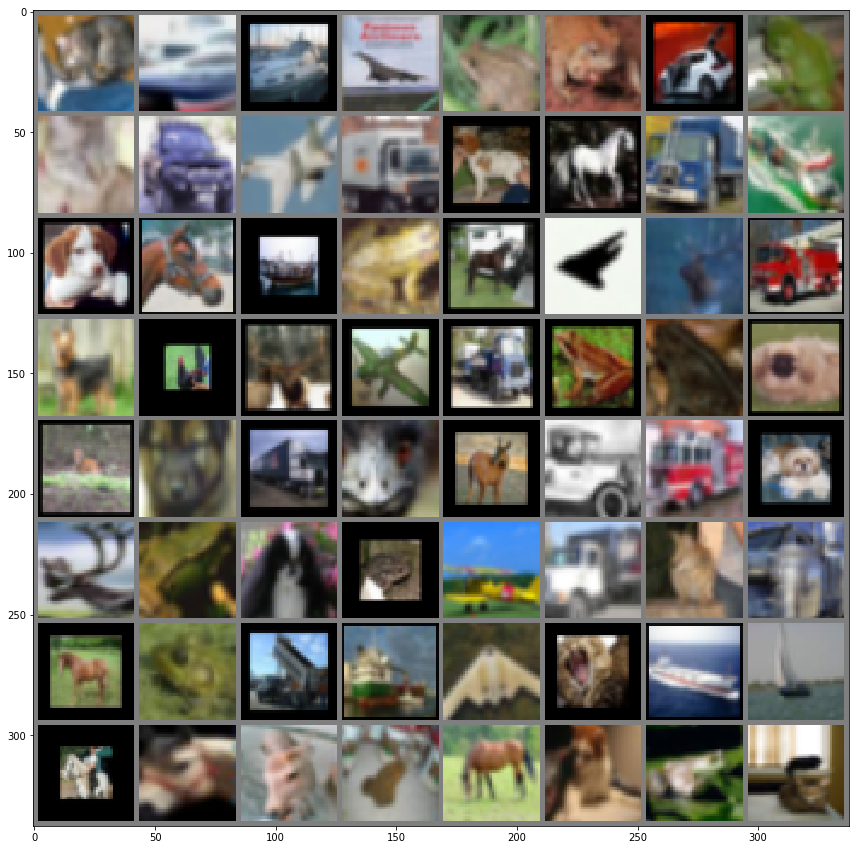

In [40]:
images = [test_set[i][0] for i in range(64)]

img = torchvision.utils.make_grid(images)
img = img / 2 + 0.5     # unnormalize
npimg = img.numpy()

plt.figure(figsize=(15, 15))
plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [24]:
x = torch.stack([img for img, label in test_set])

In [25]:
x.std()

tensor(0.4797)

In [1]:
import numpy as np

In [26]:

np.random.normal(1, 0.24)

0.8861979961347248

In [27]:
np.random.uniform(*(0.0, 2))

1.7853614883447502